# Modeling reddit comment score


Feature selection
 

In [122]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import nltk

In [123]:
df=pd.read_csv("training_comments.csv")
df.head()

,author,body,body_html,controversiality,created,created_utc,distinguished,downs,edited,gilded,id,likes,link_id,name,num_reports,parent_id,replies,score,subreddit,ups
0,Voerendaalse,&gt; Subsequent validation using a separate va...,"&lt;div class=""md""&gt;&lt;blockquote&gt;\n&lt;...",0,1446262140,1446233340,NaN,0,1446234176.0,0,cwipf39,NaN,t3_3qvj7a,t1_cwipf39,NaN,t3_3qvj7a,"{u'kind': u'Listing', u'data': {u'modhash': No...",1685,science,1685
1,Bloomsey,Peer-reviewed article: http://www.cell.com/can...,"&lt;div class=""md""&gt;&lt;p&gt;Peer-reviewed a...",0,1446260748,1446231948,NaN,0,False,0,cwiohv5,False,t3_3qvj7a,t1_cwiohv5,NaN,t3_3qvj7a,"{u'kind': u'Listing', u'data': {u'modhash': No...",660,science,660
2,schnupfndrache7,is this as revolutionary as it sounds?,"&lt;div class=""md""&gt;&lt;p&gt;is this as revo...",0,1446264074,1446235274,NaN,0,False,0,cwiqorg,NaN,t3_3qvj7a,t1_cwiqorg,NaN,t3_3qvj7a,"{u'kind': u'Listing', u'data': {u'modhash': No...",275,science,275
3,geoffp82,And then what? Full body MRI?,"&lt;div class=""md""&gt;&lt;p&gt;And then what? ...",0,1446262287,1446233487,NaN,0,False,0,cwipio1,NaN,t3_3qvj7a,t1_cwipio1,NaN,t3_3qvj7a,"{u'kind': u'Listing', u'data': {u'modhash': No...",64,science,64
4,momoneymoproblemss,Is it weird I would like to take this test on ...,"&lt;div class=""md""&gt;&lt;p&gt;Is it weird I w...",0,1446263469,1446234669,NaN,0,False,0,cwiqags,NaN,t3_3qvj7a,t1_cwiqags,NaN,t3_3qvj7a,"{u'kind': u'Listing', u'data': {u'modhash': No...",131,science,131


In [124]:
df.shape

(109982, 20)

## We clean the datahere and get rid of any data with 'nan' in submission time

In [125]:
missing_index = df['created_utc'].index[df['created_utc'].apply(np.isnan)]

In [126]:
missing_index

Int64Index([3721, 3722, 34590, 34591, 38170, 38171, 40303, 40304, 59028, 59029, 59030, 60336, 60337, 69971, 69972, 78711, 78712, 85772, 85773, 85774, 85775, 86773, 86774, 87189, 87190, 91818, 91819, 91973, 91974, 93877, 93878, 94071, 94072], dtype='int64')

In [127]:
#Drop all the values that have nan inside 
list1 = []
for index in missing_index:
    list1.append(index)

In [128]:
df = df.drop(df.index[list1])

In [129]:
df.shape

(109949, 20)

## Feature Engineering

We added the following features from the comment data

1.)*com_len* - Length of comment 

2.) *word_num* - number of words 

3.)number of swear words  - swear_num

4.)Sentiment Analysis score (to be added soon) - Sentiment 

5.)tokenized sentence  - token 

6.) time of submissions - redivided into 10 min intervals 

7.) lem - lemminized and cleaned up texts

8.) over100 -  1 if over 100 upvote score

In [130]:
#Function to tokenize comments
from nltk.tokenize import RegexpTokenizer
def tokenize(comment):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(str(comment))
#Function to calculate length of comment
def len_com(comment):
    return len(str(comment))
#function to calculate number of words
def word_num(token):
    return len(token)


import re
import string
regex = re.compile('[%s]' % re.escape(string.punctuation)) #see documentation here: http://docs.python.org/2/library/string.html

no_punctuation = []
def r
for review in tokenized_docs:
    
    new_review = []
    for token in review: 
        new_token = regex.sub(u'', token)
        if not new_token == u'':
            new_review.append(new_token)
    
    tokenized_docs_no_punctuation.append(new_review)
    
print tokenized_docs_no_punctuation

In [152]:
#function for telling whether over 100 upvote or not
def over100(upvote):
    if upvote > 100:
        return 1
    else:
        return 0

We add the new columns here

In [153]:
df['com_len'] = df.body.apply(len_com)
df['token'] = df.body.apply(tokenize)
df['word_num'] = df.token.apply(word_num)
df['over100'] = df.ups.apply(over100)

In [154]:
df.head()

,author,body,body_html,controversiality,created,created_utc,distinguished,downs,edited,gilded,id,likes,link_id,name,num_reports,parent_id,replies,score,subreddit,ups,com_len,token,word_num,time,over100
0,Voerendaalse,&gt; Subsequent validation using a separate va...,"&lt;div class=""md""&gt;&lt;blockquote&gt;\n&lt;...",0,1446262140,1446233340,NaN,0,1446234176.0,0,cwipf39,NaN,t3_3qvj7a,t1_cwipf39,NaN,t3_3qvj7a,"{u'kind': u'Listing', u'data': {u'modhash': No...",1685,science,1685,1083,"[gt, Subsequent, validation, using, a, separat...",198,93,1
1,Bloomsey,Peer-reviewed article: http://www.cell.com/can...,"&lt;div class=""md""&gt;&lt;p&gt;Peer-reviewed a...",0,1446260748,1446231948,NaN,0,False,0,cwiohv5,False,t3_3qvj7a,t1_cwiohv5,NaN,t3_3qvj7a,"{u'kind': u'Listing', u'data': {u'modhash': No...",660,science,660,85,"[Peer, reviewed, article, http, www, cell, com...",15,91,1
2,schnupfndrache7,is this as revolutionary as it sounds?,"&lt;div class=""md""&gt;&lt;p&gt;is this as revo...",0,1446264074,1446235274,NaN,0,False,0,cwiqorg,NaN,t3_3qvj7a,t1_cwiqorg,NaN,t3_3qvj7a,"{u'kind': u'Listing', u'data': {u'modhash': No...",275,science,275,38,"[is, this, as, revolutionary, as, it, sounds]",7,96,1
3,geoffp82,And then what? Full body MRI?,"&lt;div class=""md""&gt;&lt;p&gt;And then what? ...",0,1446262287,1446233487,NaN,0,False,0,cwipio1,NaN,t3_3qvj7a,t1_cwipio1,NaN,t3_3qvj7a,"{u'kind': u'Listing', u'data': {u'modhash': No...",64,science,64,29,"[And, then, what, Full, body, MRI]",6,93,0
4,momoneymoproblemss,Is it weird I would like to take this test on ...,"&lt;div class=""md""&gt;&lt;p&gt;Is it weird I w...",0,1446263469,1446234669,NaN,0,False,0,cwiqags,NaN,t3_3qvj7a,t1_cwiqags,NaN,t3_3qvj7a,"{u'kind': u'Listing', u'data': {u'modhash': No...",131,science,131,153,"[Is, it, weird, I, would, like, to, take, this...",32,95,1


In [133]:
#function to divide and categorize submission time by 10 min eachvectorizer = CountVectorizer(min_df=0)
import datetime
def convert_time(time):
    Hour = datetime.datetime.fromtimestamp(time).strftime('%H')
    Min = datetime.datetime.fromtimestamp(time).strftime('%M')
    return int(Hour)*6 + (round(int(Min), -1)/10)

In [134]:
df['time'] = df.created_utc.apply(convert_time)

# Some Modelling Methods 


In [156]:
#Naive base model for whether its good or not [ SELECTED TERRIBLE FEATURE]

In [155]:
def make_xy(x, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(x.body)
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (x.over100 == 1).values.astype(np.int)
    return X, y
X, y = make_xy(df)

In [159]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y)
clf = MultinomialNB().fit(xtrain, ytrain)
print "MN Accuracy: %0.2f%%" % (100 * clf.score(xtest, ytest))

MN Accuracy: 93.87%


In [160]:
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)

Accuracy on training data: 0.95
Accuracy on test data:     0.94


In [161]:
from sklearn.cross_validation import KFold
def cv_score(clf, X, y, scorefunc):
    result = 0.
    nfold = 5
    for train, test in KFold(y.size, nfold): # split data into train/test groups, 5 times
        clf.fit(X[train], y[train]) # fit
        result += scorefunc(clf, X[test], y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [162]:
def log_likelihood(clf, x, y):
    prob = clf.predict_log_proba(x)
    rotten = y == 0
    fresh = ~rotten
    return prob[rotten, 0].sum() + prob[fresh, 1].sum()

In [164]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(df.shape[0]), train_size=0.7)
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [166]:
#the grid of parameters to search over
alphas = [0, .1, 1, 5, 10, 50]
min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
best_min_df = None
maxscore=-np.inf
for alpha in alphas:
    for min_df in min_dfs:         
        vectorizer = CountVectorizer(min_df = min_df)       
        Xthis, ythis = make_xy(df, vectorizer)
        Xtrainthis=Xthis[mask]
        ytrainthis=ythis[mask]
        #your code here
        clf = MultinomialNB(alpha=alpha)
        cvscore = cv_score(clf, Xtrainthis, ytrainthis, log_likelihood)

        if cvscore > maxscore:
            maxscore = cvscore
            best_alpha, best_min_df = alpha, min_df

In [167]:
print "alpha: %f" % best_alpha
print "min_df: %f" % best_min_df

alpha: 50.000000
min_df: 0.100000


In [169]:
vectorizer = CountVectorizer(min_df=best_min_df)
X, y = make_xy(df, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

clf = MultinomialNB(alpha=best_alpha).fit(xtrain, ytrain)

# Your code here. Print the accuracy on the test and training dataset
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)

Accuracy on training data: 0.96
Accuracy on test data:     0.96


In [170]:
from sklearn.metrics import confusion_matrix
print confusion_matrix(ytest, clf.predict(xtest))

[[31546    18]
 [ 1418     3]]


In [171]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(xtest.shape[1])
probs = clf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

print "Good words\t     P(fresh | word)"
for w, p in zip(good_words, good_prob):
    print "%20s" % w, "%0.2f" % (1 - np.exp(p))
    
print "Bad words\t     P(fresh | word)"
for w, p in zip(bad_words, bad_prob):
    print "%20s" % w, "%0.2f" % (1 - np.exp(p))

Good words	     P(fresh | word)
                 was 0.05
                  of 0.05
                 not 0.05
                  in 0.05
                 the 0.05
                 and 0.05
              people 0.05
                  on 0.05
                with 0.04
                  to 0.04
Bad words	     P(fresh | word)
                have 0.04
                  we 0.04
                  so 0.04
                  if 0.04
                  be 0.04
                 you 0.04
                like 0.04
                  it 0.04
                 all 0.04
                what 0.03


In [172]:

def calibration_plot(clf, xtest, ytest):
    prob = clf.predict_proba(xtest)[:, 1]
    outcome = ytest
    data = pd.DataFrame(dict(prob=prob, outcome=outcome))

    #group outcomes into bins of similar probability
    bins = np.linspace(0, 1, 20)
    cuts = pd.cut(prob, bins)
    binwidth = bins[1] - bins[0]
    
    #freshness ratio and number of examples in each bin
    cal = data.groupby(cuts).outcome.agg(['mean', 'count'])
    cal['pmid'] = (bins[:-1] + bins[1:]) / 2
    cal['sig'] = np.sqrt(cal.pmid * (1 - cal.pmid) / cal['count'])
        
    #the calibration plot
    ax = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    p = plt.errorbar(cal.pmid, cal['mean'], cal['sig'])
    plt.plot(cal.pmid, cal.pmid, linestyle='--', lw=1, color='k')
    plt.ylabel("Empirical P(Fresh)")
    
    #the distribution of P(fresh)
    ax = plt.subplot2grid((3, 1), (2, 0), sharex=ax)
    
    plt.bar(left=cal.pmid - binwidth / 2, height=cal['count'],
            width=.95 * (bins[1] - bins[0]),
            fc=p[0].get_color())
    
    plt.xlabel("Predicted P(Fresh)")
    plt.ylabel("Number")

C:\Users\You-Myeong\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


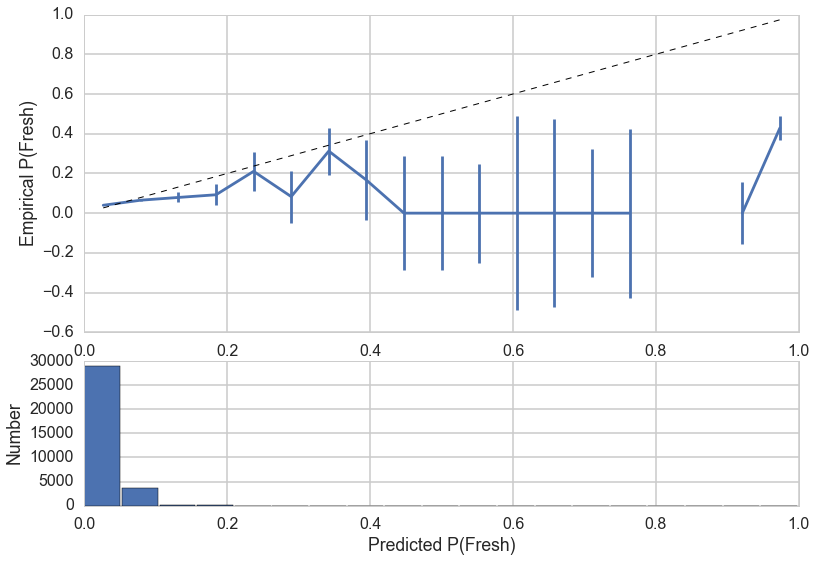

In [173]:
calibration_plot(clf, xtest, ytest)


# Regression model RMSE